In [1]:
#Imports
import numpy as np 
from NNetwork import NNetwork as nn
import networkx as nx
#import utils.NNetwork as nn
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from src.helper_functions import display_graphs, display_dict_and_graph, display_graphs_dict_graph, motif_sample_display_list

In [2]:

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})

# Subgraphs induced on uniformly random k-paths

In [ ]:
#ntwk_list = ['Caltech36', 'UCLA26', 'Wisconsin87', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Wisconsin87', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'Network_dictionary/test1/'

graph_list = []
for ntwk in ntwk_list:
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    path = "Data/Facebook/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))
    

In [ ]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{Wisconsin}}$', '$\\textsc{\\texttt{ER}}$', '$\\textsc{\\texttt{BA}}$', '$\\textsc{\\texttt{WS}}$', '$\\textsc{\\texttt{SBM}}$'],
                          subtitle=['$\\textsc{\\texttt{Wisconsin}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[4,6],
                          sampling_alg = 'RW',
                          save_path = 'Figures/subgraphs_ex2.pdf',
                          fig_size = [15,4])

In [ ]:
motif_sample_display_list(list_graphs=graph_list, k=20, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex1.pdf',
                          fig_size = [15,4])

In [ ]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

## Graph plot of WAN

In [84]:
def display_wtd_nx_graph(A, node_labels=None,
                    title=None,
                     save_path=None,
                     fig_size=[10,10],
                     show_importance=False):


        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        outer_grid = gridspec.GridSpec(nrows=1, ncols=1, wspace=0.02, hspace=0.05)
        #inner_grid = outer_grid[0].subgridspec(1, 1, wspace=Ndict_wspace, hspace=Ndict_hspace)

        # read in as a nx graph for plotting
        G1 = nx.Graph()
        for i in np.arange(A.shape[0]):
            for j in np.arange(A.shape[1]):
                #G1.add_edge(i,j, color='b', weight=np.log(np.log(A[i,j]+1) + 1 ) )
                if A[i,j]>0:
                    a = i
                    b = j
                    if node_labels is not None:
                        a = node_labels[i]
                        b = node_labels[j]
                    
                    G1.add_edge(a,b , color='b', weight=np.log(A[i,j]+1) )
        G2 = G1
        print("num nodes={}".format(len(list(G2.nodes()))))
        #G2 = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])

        ax = fig.add_subplot(outer_grid[0,0])
        #pos = nx.spring_layout(G2)
        #pos = nx.circular_layout(G2)
        pos = nx.kamada_kawai_layout(G2)
        #pos = nx.spectral_layout(G2)
        #pos = nx.spiral_layout(G2)
       
        
        edges = G2.edges()
        colors = [G2[u][v]['color'] for u,v in edges]

        weights = [0.01*G2[u][v]['weight'] for u,v in edges]
        nx.draw(G2, with_labels=True, node_size=20, ax=ax, pos=pos,
                width=weights, edge_color=colors, label='Graph')

        ax.set_xticks([])
        ax.set_yticks([])
        if title is not None:
            plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        if save_path is not None:
            fig.savefig(save_path, bbox_inches='tight')

In [85]:
path = "WAN/abbott_1.txt"
A = np.genfromtxt(path)

In [86]:
# Read in function word list
path1 = "Output_files/functionwords_list.txt"

with open(path1) as f:
    lines = f.readlines()

word_list = lines[0].split(' ')

num nodes=146


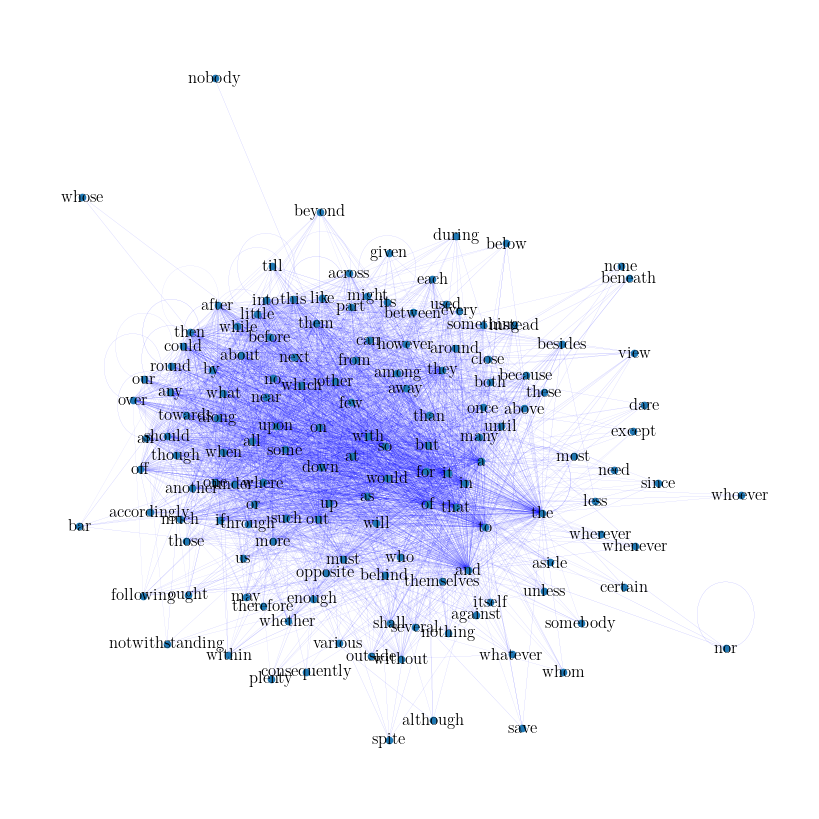

In [87]:
display_wtd_nx_graph(A, node_labels=word_list)

## MCMC motif sampling movie

In [ ]:
def plot_graph_motif(G, X, embs, path=None):
    # G = nx.Graph()
    # X = k^2 x T vectorized adjacency matrices of induced subgraphs on k-chain motifs 
    # embs = sequence of homomorphisms from k-chain motif into the network 
    pos = nx.spring_layout(G, seed=1)
    for i in trange(X.shape[1]//2, X.shape[1]):
        emb = embs[i]
        
        idx = np.arange(X.shape[1])
        A = X[:,idx[i]]
        A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
        H = nn.NNetwork()
        H.read_adj(A, embs[idx[i]])

        G4 = nx.Graph()
        G5 = nx.Graph()

        for u,v in G3.edges():
            G4.add_edge(u,v, color='k', weight=0.1)

        for a in np.arange(len(emb)):
            for b in np.arange(len(emb)):
                u = emb[a]
                v = emb[b]
                if H.has_edge(u,v):
                    if np.abs(a-b) == 1:
                        #print("a,b", [a,b])
                        G4.add_edge(u,v, color='r', weight=2)
                        G5.add_edge(u,v, color='r', weight=2)
                    elif not G5.has_edge(u,v):
                        G4.add_edge(u,v, color='b', weight=1)
                        G5.add_edge(u,v, color='b', weight=1)
                        
        fig = plt.figure(figsize=[15,10], constrained_layout=False)
        outer_grid = gridspec.GridSpec(nrows=2, ncols=3, wspace=0.02, hspace=0.05, width_ratios=[1.5, 1.5, 1])
        
        # Main network+motif 
        inner_grid = outer_grid[:,:2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G4.edges()
        colors = [G4[u][v]['color'] for u,v in edges]

        weights = [1*G4[u][v]['weight'] for u,v in edges]
        nx.draw(G4, with_labels=False, node_size=20, ax=ax,
                width=weights, edge_color=colors, label='Graph', pos=pos)
        
        # Separate induced subgraph on the motif
        inner_grid = outer_grid[0,2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G5.edges()
        colors = [G5[u][v]['color'] for u,v in edges]

        weights = [1*G5[u][v]['weight'] for u,v in edges]
        nx.draw(G5, with_labels=False, node_size=40, ax=ax,
                width=weights, edge_color=colors, label='Graph', pos=pos)
        
        # Adjaceny matrix of the sampled subgraph 
        inner_grid = outer_grid[1,2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.imshow(A)
        
        if path is not None:
            plt.savefig(path+"_"+str(i), bbox_inches="tight", transparent=False)

In [ ]:
path = "Data/Facebook/Caltech36.txt"
G2 = nn.NNetwork()
G2.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
G3 = nx.Graph(G2.get_edges())

print("# nodes", len(G2.nodes()))

fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G3, seed=1)
edges = G3.edges()
weights = [0.1 for u,v in G3.edges]
nx.draw(G3, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.savefig("Output_files/graph_plot_test", bbox_inches="tight", transparent=True)

In [ ]:
X, embs = G2.get_patches(k=5, sample_size=1, skip_folded_hom=True, sampling_alg="pivot")

In [ ]:

def display_graphs(title=None,
                     save_path=None,
                     grid_shape=[2,3],
                     fig_size=[10,10],
                     data = None, # [X, embs]
                     show_importance=False):

        # columns of X = vectorized k x k adjacency matrices
        # corresponding list in embs = sequence of nodes (may overalp)
        X, embs = data
        print('X.shape', X.shape)

        rows = grid_shape[0]
        cols = grid_shape[1]

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        idx = np.arange(X.shape[1])
        outer_grid = gridspec.GridSpec(nrows=rows, ncols=cols, wspace=0.02, hspace=0.05)

        # make nested gridspecs
        for i in range(rows * cols):
            emb = embs[idx[i]]

            a = i // cols
            b = i % cols

            Ndict_wspace = 0.05
            Ndict_hspace = 0.05

            # display graphs
            inner_grid = outer_grid[i].subgridspec(1, 1, wspace=Ndict_wspace, hspace=Ndict_hspace)

            # get rid of duplicate nodes
            A = X[:,idx[i]]
            A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
            H = nn.NNetwork()
            H.read_adj(A, embs[idx[i]])
            A_sub = H.get_adjacency_matrix()

            # read in as a nx graph for plotting

            G1 = nx.Graph()
            for a in np.arange(len(emb)):
                G1.add_node(emb[a])

            for a in np.arange(len(emb)):
                for b in np.arange(len(emb)):
                    u = emb[a]
                    v = emb[b]

                    if H.has_edge(u,v):
                        if np.abs(a-b) == 1:
                            G1.add_edge(u,v, color='r', weight=2)
                        else:
                            G1.add_edge(u,v, color='b', weight=0.5)


            ax = fig.add_subplot(inner_grid[0, 0])
            pos = nx.spring_layout(G1)
            edges = G1.edges()
            colors = [G1[u][v]['color'] for u,v in edges]

            weights = [10*G1[u][v]['weight'] for u,v in edges]
            nx.draw(G1, with_labels=False, node_size=20, ax=ax,
                    width=weights, edge_color=colors, label='Graph')

            ax.set_xticks([])
            ax.set_yticks([])
        if title is not None:
            plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        if save_path is not None:
            fig.savefig(save_path, bbox_inches='tight')